In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [3]:
# Load dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values  # Position levels
y = dataset.iloc[:, 2].values    # Salaries

In [4]:
# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

In [5]:
# Reshape y for scaling, then flatten after scaling
y = y.reshape(-1, 1)
y = sc_y.fit_transform(y).flatten()

In [6]:
# fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

SVR()

In [7]:
# Predicting a new result with SVR
scaled_input = sc_X.transform([[6.5]])
y_pred_scaled = regressor.predict(scaled_input)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
print(f"Predicted salary for level 6.5: {y_pred[0, 0]}")

Predicted salary for level 6.5: 170370.02040650236


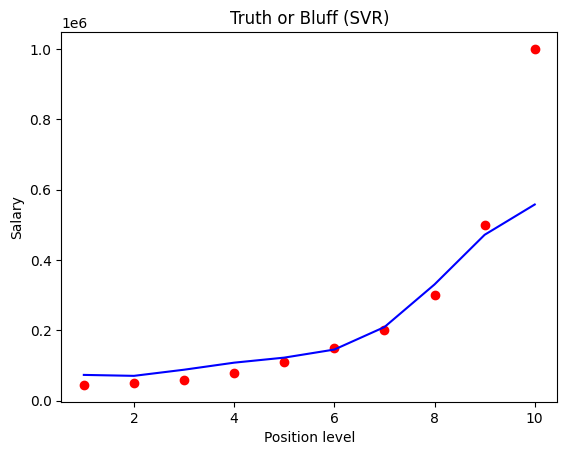

In [8]:
# Visualizing the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1, 1)), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color="blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()




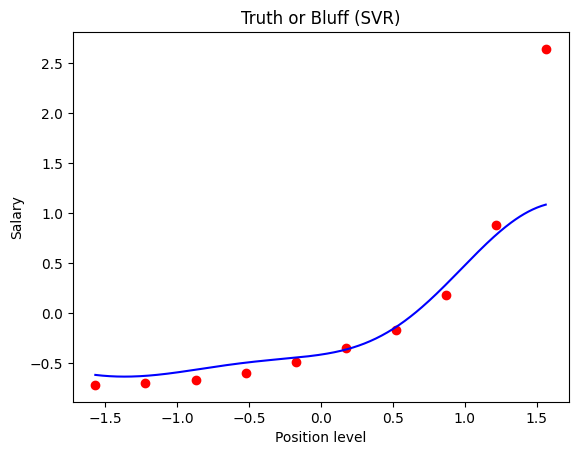

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)  # Creates a grid with 0.01 step for smoother curve
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()